# Homework 0
- Author: Ryan Kingery
- Course: ECE 5554 - Computer Vision
- Instructor: Dr. Jia-Bin Huang

In [35]:
%matplotlib inline
import numpy as np
import imageio
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image

In [2]:
data_path = '/Users/ryankingery/Repos/computer-vision-course/data/'

In [57]:
def plot_image(image):
    _, ax = plt.subplots(figsize=(8, 8))
    if len(image.shape)<3:
        cmap = cm.gray
    else:
        cmap = None
    ax.imshow(image, cmap=cmap)
    ax.axis('off')
    plt.show()

In [48]:
image = imageio.imread(data_path+'hokiebird.jpg')

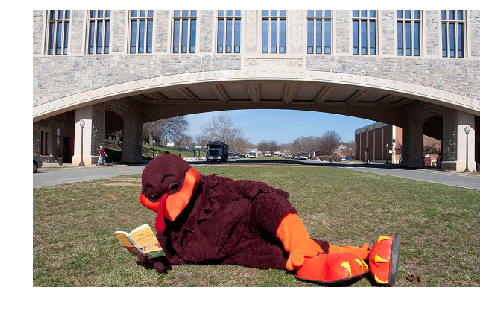

In [58]:
plot_image(image)

## Problem 1

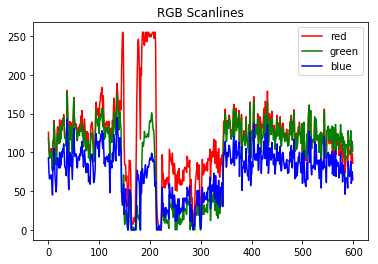

In [67]:
plt.plot(image[249,:,0],c='red',label='red')
plt.plot(image[249,:,1],c='green',label='green')
plt.plot(image[249,:,2],c='blue',label='blue')
plt.legend()
plt.title('RGB Scanlines')
plt.show()

## Problem 2

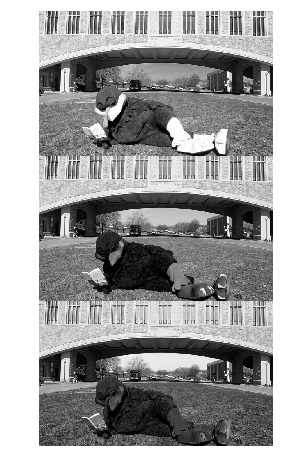

In [59]:
stacked = np.vstack([image[:,:,0],image[:,:,1],image[:,:,2]])
plot_image(stacked)

## Problem 3

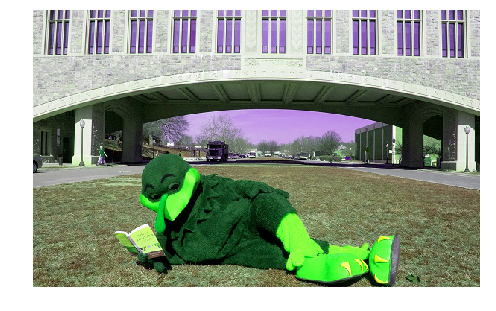

In [60]:
swapped = np.array([image[:,:,1],image[:,:,0],image[:,:,2]]).transpose(1,2,0)
plot_image(swapped)

## Problem 4

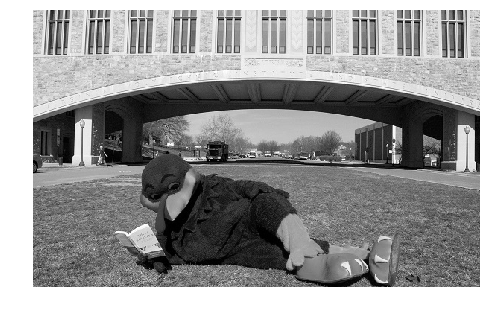

In [61]:
grayscaled = np.array(Image.fromarray(image).convert('L'))
plot_image(grayscaled)

## Problem 5

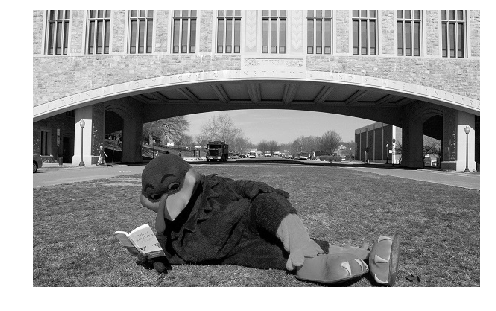

In [69]:
mean = np.mean(image,axis=2)
plot_image(mean)

## Problem 6

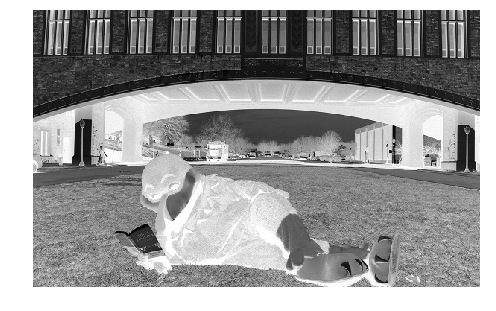

In [76]:
negative = 255-grayscaled
plot_image(negative)

## Problem 7

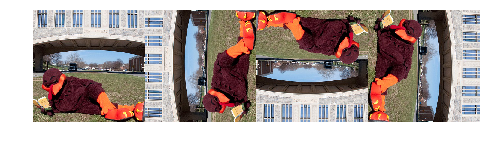

In [99]:
cut = (600-372)//2
c_0 = Image.fromarray(image).crop((0+cut,0,600-cut,372))
c_90 = np.array(c_0.rotate(90))
c_180 = np.array(c_0.rotate(180))
c_270 = np.array(c_0.rotate(270))
hstack = np.hstack((c_0,c_90,c_180,c_270))
plot_image(hstack)

## Problem 8

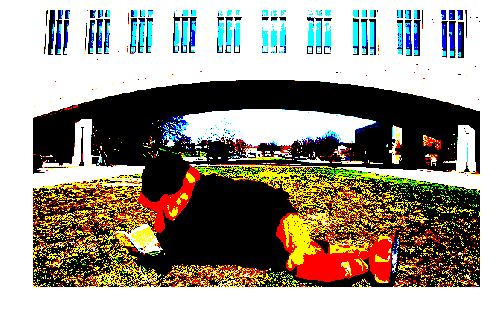

In [82]:
new_image = np.zeros(image.shape)
new_image[image > 127] = 255
new_image = new_image.astype(int)
plot_image(new_image)

## Problem 9

In [129]:
mean_red = np.mean(new_image[:,:,0])
mean_green = np.mean(new_image[:,:,1])
mean_blue = np.mean(new_image[:,:,2])

print('mean red:',mean_red)
print('mean green:',mean_green)
print('mean blue:',mean_blue)

mean red: 129.24112903225807
mean green: 119.1233870967742
mean blue: 97.73400537634409


## Problem 10

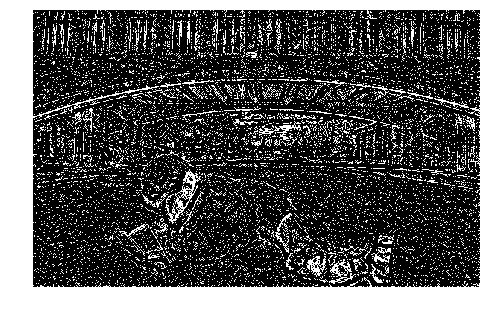

In [133]:
new_grayscaled = np.zeros(grayscaled.shape)
for i in range(len(grayscaled)):
    for j in range(len(grayscaled[i])):
        local = grayscaled[i:min(len(grayscaled),i+6),j:min(len(grayscaled[i]),j+6)]
        max_val = np.max(local)
        for ii in range(len(local)):
            for jj in range(len(local[ii])):
                if local[ii,jj] == max_val:
                    new_grayscaled[i+ii,j+jj] = 255
plot_image(new_grayscaled)